# Atractor de Lorentz

Este cuaderno realiza una simulación sencilla del **Atractor de Lorenz**. La idea principal de esta simulación es replicar el logo de [RIdeC-Perú](https://www.facebook.com/RIDECPERUOFICIAL), ya que los archivos originales se habían perdido y se necesitaba un archivo vectorial para trabajar en los prototipos en Figma.

Primero, asegurémonos de tener instaladas las librerías necesarias para ejecutar la simulación y generar el gráfico.

In [1]:
%%capture
%pip install scipy pillow matplotlib

Importamos las librerías necesarias para el cálculo y la visualización del sistema de Lorenz.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

Establecemos los parámetros iniciales y las constantes del sistema de Lorenz.

In [3]:
# Estado inicial del sistema [x0, y0, z0]
estado_inicial = [0.1, 0.0, 0.0]

# Parámetros del sistema de Lorenz
sigma = 10.0  # Tasa de cambio en x
rho = 28.0    # Parámetro de Rayleigh
beta = 8.0 / 3.0  # Constante de expansión

# Parámetros de tiempo para la simulación
tiempo_inicio = 1
tiempo_fin = 60
intervalos = 500
puntos_tiempo = np.linspace(tiempo_inicio, tiempo_fin, tiempo_fin * intervalos)

Definimos las ecuaciones diferenciales que describen el sistema de Lorenz.

In [4]:
def sistema_lorenz(estado_actual, t):
    """
    Calcula las derivadas para el sistema de Lorenz.
    
    Parámetros:
        estado_actual (list): Estado actual del sistema [x, y, z].
        t (float): Tiempo.
    
    Retorna:
        list: Derivadas [dx/dt, dy/dt, dz/dt].
    """
    x, y, z = estado_actual
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

Utilizamos el método `odeint` de Scipy para resolver las ecuaciones diferenciales.

In [5]:
puntos = odeint(sistema_lorenz, estado_inicial, puntos_tiempo)

Creamos una función para graficar el atractor de Lorenz en 3D y guardarlo como un archivo SVG con fondo transparente.

In [6]:
def graficar_lorenz(coordenadas, nombre_archivo):
    """
    Grafica el atractor de Lorenz y lo guarda en un archivo SVG.
    
    Parámetros:
        coordenadas (ndarray): Coordenadas [x, y, z] del atractor.
        nombre_archivo (str): Nombre del archivo de salida.
    """
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')

    # Configurar el fondo transparente
    fig.patch.set_alpha(0)
    ax.patch.set_alpha(0)

    # Configurar los colores de las panes (paredes) del gráfico
    ax.xaxis.set_pane_color((1, 1, 1, 1))
    ax.yaxis.set_pane_color((1, 1, 1, 1))
    ax.zaxis.set_pane_color((1, 1, 1, 1))

    # Extraer las coordenadas
    x = coordenadas[:, 0]
    y = coordenadas[:, 1]
    z = coordenadas[:, 2]

    # Graficar la curva del atractor
    ax.plot(x, y, z, color='k', alpha=0.7, linewidth=0.9, antialiased=True)

    # Eliminar los ticks y los ejes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.axis('off')

    # Guardar el gráfico como archivo SVG con transparencia
    plt.savefig(nombre_archivo, format='svg', transparent=True)
    plt.close()

Finalmente, generamos el gráfico del atractor de Lorenz y lo guardamos como final_lorenz_attractor.svg.

In [7]:
nombre_archivo_salida = 'final_lorenz_attractor.svg'
graficar_lorenz(puntos, nombre_archivo_salida)

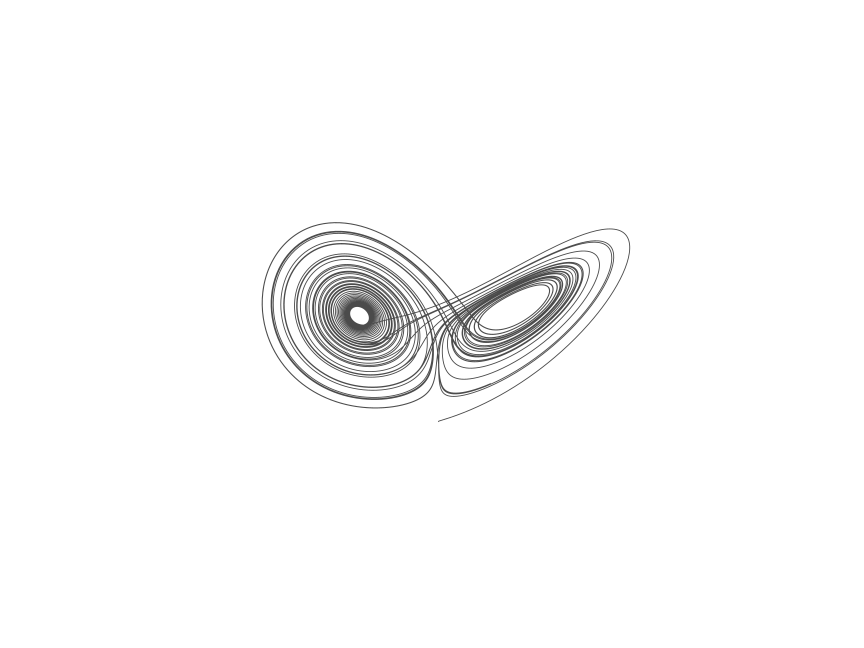

In [8]:
from IPython.display import SVG, display
display(SVG(filename=nombre_archivo_salida))